Ellis parcel level dataset clean and join notebook

Datasets:

Ellis Act Filing Records 2007- Present (May 2021): https://hcidla2.lacity.org/ELLIS - base dataset

Los Angeles County Assessors Parcel Records (2006): https://data.lacounty.gov/Parcel-/Assessor-Parcels-Data-2006/jw2a-m8k9 - used to identify original parcel spatial information (joined center lat and long)

Los Angeles County Assessors Parcel Records (2021): Purchased by SAJE, used with permissions - used to identify current parcel status and ownership for entity type sample - GEOJSON export including selected columns for LA city parcels from SAJE owned geopackage


In [1]:
#Import modules: pandas/geopandas
import pandas as pd
import geopandas as gpd

In [2]:
#Read and clean Ellis Dataset
ellisdf = pd.read_csv('/Users/alexanderferrer/Downloads/ellis_cpra_workbook.csv') 
ellisdf.columns = ellisdf.columns.str.replace(' ','_')
ellisdf.columns = ellisdf.columns.str.lower()
ellisdf = ellisdf.fillna(0)
ellisdf.head(10)

,apn,application_received,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit
0,2040031029,11/6/19,2019,3,22729 W DEL VALLE ST,LOS ANGELES,91364.0,3,0.0
1,2040031030,12/4/19,2019,3,22727 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0
2,2040031050,2/25/16,2016,3,22769 W DEL VALLE ST,LOS ANGELES,91364.0,2,0.0
3,2040033033,2/10/16,2016,3,22431 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0
4,2107014004,4/21/20,2020,3,20327 W STAGG ST,LOS ANGELES,91306.0,3,0.0
5,2111025021,3/16/16,2016,3,7118 N JORDAN AVE,CANOGA PARK,91303.0,2,9.0
6,2112024012,8/13/15,2015,3,7310 N ETON AVE,LOS ANGELES,91303.0,2,0.0
7,2121005006,8/11/15,2015,3,7325 N ENFIELD AVE,LOS ANGELES,91335.0,1,0.0
8,2126006014,2/13/15,2015,3,18561 W GAULT ST,LOS ANGELES,91335.0,2,33.0
9,2126023007,8/15/13,2013,3,6819 N BAIRD AVE,RESEDA,91335.0,2,7.0


In [3]:
#Import 2006 parcels dataset 
parcels2006df=pd.read_csv('/Users/alexanderferrer/Downloads/Assessor_Parcels_Data_-_2006.csv')

/Applications/anaconda3/envs/UP299/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#Check import
parcels2006df.columns = parcels2006df.columns.str.lower()
parcels2006df.head(10)

,zipcode,taxratearea_city,ain,rollyear,taxratearea,assessorid,propertylocation,propertytype,propertyusecode,generalusetype,...,housefraction,streetdirection,streetname,unitno,city,zipcode5,rowid,center_lat,center_lon,location 1
0,,LOS ANGELES,2137019904,2006,16,2137-019-904,NaN,OTH,8800,Miscellaneous,...,,,,,,NaN,20062137019904,34.198602,-118.587825,"(34.1986019, -118.58782478)"
1,,LOS ANGELES,2137019905,2006,16,2137-019-905,NaN,OTH,8800,Miscellaneous,...,,,,,,NaN,20062137019905,34.198327,-118.587824,"(34.19832711, -118.58782406)"
2,91303,LOS ANGELES,2139004022,2006,8852,2139-004-022,6601 OWENSMOUTH AVE LOS ANGELES CA 91303,VAC,100V,Commercial,...,,,OWENSMOUTH AVE,,LOS ANGELES CA,91303.0,20062139004022,34.189568,-118.602411,"(34.18956791, -118.60241052)"
3,,LOS ANGELES,2146035020,2006,16,2146-035-020,NaN,VAC,010V,Residential,...,,,,,,NaN,20062146035020,34.173978,-118.610223,"(34.17397819, -118.61022349)"
4,,LOS ANGELES,2146035042,2006,16,2146-035-042,NaN,VAC,010V,Residential,...,,,,,,NaN,20062146035042,34.174159,-118.610049,"(34.17415864, -118.61004922)"
5,,LOS ANGELES,2146035037,2006,16,2146-035-037,NaN,VAC,010V,Residential,...,,,,,,NaN,20062146035037,34.173818,-118.610286,"(34.17381817, -118.61028618)"
6,,LOS ANGELES,2149004020,2006,16,2149-004-020,NaN,VAC,010V,Residential,...,,,,,,NaN,20062149004020,34.183065,-118.588964,"(34.18306543, -118.58896362)"
7,,LOS ANGELES,2146040059,2006,16,2146-040-059,NaN,CND,010E,Residential,...,,,,,,NaN,20062146040059,34.171787,-118.599718,"(34.17178711, -118.59971815)"
8,,LOS ANGELES,2153035024,2006,16,2153-035-024,NaN,VAC,010V,Residential,...,,,,,,NaN,20062153035024,34.179388,-118.553707,"(34.17938757, -118.55370681)"
9,,LOS ANGELES,2161023027,2006,37,2161-023-027,NaN,VAC,010V,Residential,...,,,,,,NaN,20062161023027,34.164488,-118.532369,"(34.1644885, -118.53236901)"


In [5]:
#Join parcel information to Ellis Dataset

ellisdf = ellisdf.set_index('apn')

parcels2006df = parcels2006df.set_index('ain')

joineddf = ellisdf.join(parcels2006df, how="left",rsuffix='_parcel')

joineddf.head(10)


,application_received,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit,zipcode,taxratearea_city,...,housefraction,streetdirection,streetname,unitno,city_parcel,zipcode5,rowid,center_lat,center_lon,location 1
2040031029,11/6/19,2019,3,22729 W DEL VALLE ST,LOS ANGELES,91364.0,3,0.0,91364-1380,LOS ANGELES,...,,,DEL VALLE ST,,LOS ANGELES CA,91364.0,2.006204e+13,34.165880,-118.621319,"(34.16587989, -118.62131891)"
2040031030,12/4/19,2019,3,22727 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,91364-1379,LOS ANGELES,...,,,DEL VALLE ST,APT 0001,LOS ANGELES CA,91364.0,2.006204e+13,34.165929,-118.621164,"(34.16592862, -118.62116436)"
2040031050,2/25/16,2016,3,22769 W DEL VALLE ST,LOS ANGELES,91364.0,2,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2040033033,2/10/16,2016,3,22431 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,91364-1529,LOS ANGELES,...,,,DEL VALLE ST,,LOS ANGELES CA,91364.0,2.006204e+13,34.167389,-118.616525,"(34.16738928, -118.61652521)"
2107014004,4/21/20,2020,3,20327 W STAGG ST,LOS ANGELES,91306.0,3,0.0,91306-2209,LOS ANGELES,...,,,STAGG ST,,LOS ANGELES CA,91306.0,2.006211e+13,34.211389,-118.576350,"(34.21138869, -118.57635049)"
2111025021,3/16/16,2016,3,7118 N JORDAN AVE,CANOGA PARK,91303.0,2,9.0,91303-1927,LOS ANGELES,...,,,JORDAN AVE,,LOS ANGELES CA,91303.0,2.006211e+13,34.199760,-118.602505,"(34.19976008, -118.60250536)"
2112024012,8/13/15,2015,3,7310 N ETON AVE,LOS ANGELES,91303.0,2,0.0,91303-1507,LOS ANGELES,...,,,ETON AVE,,LOS ANGELES CA,91303.0,2.006211e+13,34.203280,-118.595121,"(34.20328039, -118.59512137)"
2121005006,8/11/15,2015,3,7325 N ENFIELD AVE,LOS ANGELES,91335.0,1,0.0,91335-3204,LOS ANGELES,...,,,ENFIELD AVE,,LOS ANGELES CA,91335.0,2.006212e+13,34.203684,-118.524593,"(34.20368352, -118.52459288)"
2126006014,2/13/15,2015,3,18561 W GAULT ST,LOS ANGELES,91335.0,2,33.0,91335-4142,LOS ANGELES,...,,,GAULT ST,,LOS ANGELES CA,91335.0,2.006213e+13,34.199446,-118.538227,"(34.19944555, -118.53822729)"
2126023007,8/15/13,2013,3,6819 N BAIRD AVE,RESEDA,91335.0,2,7.0,91335-4110,LOS ANGELES,...,,,BAIRD AVE,,LOS ANGELES CA,91335.0,2.006213e+13,34.194443,-118.537690,"(34.19444264, -118.53768989)"


In [6]:
#Check join
joineddf.columns

Index(['application_received', 'application_year', 'council_district',
       'address', 'city', 'zip', 'units_withdrawn', 'replacement_unit',
       'zipcode', 'taxratearea_city', 'rollyear', 'taxratearea', 'assessorid',
       'propertylocation', 'propertytype', 'propertyusecode', 'generalusetype',
       'specificusetype', 'specificusedetail1', 'specificusedetail2',
       'totbuildingdatalines', 'yearbuilt', 'effectiveyearbuilt', 'sqftmain',
       'bedrooms', 'bathrooms', 'units', 'recordingdate', 'landvalue',
       'landbaseyear', 'improvementvalue', 'impbaseyear', 'totallandimpvalue',
       'homeownersexemption', 'realestateexemption', 'fixturevalue',
       'fixtureexemption', 'personalpropertyvalue',
       'personalpropertyexemption', 'istaxableparcel?', 'totalvalue',
       'totalexemption', 'nettaxablevalue', 'specialparcelclassification',
       'administrativeregion', 'cluster', 'parcelboundarydescription',
       'houseno', 'housefraction', 'streetdirection', 'streetna

In [7]:
#Drop unescessary columns
joineddf = joineddf[['application_received', 'application_year', 'council_district',
       'address', 'city', 'zip', 'units_withdrawn', 'replacement_unit','yearbuilt','units','sqftmain', 'generalusetype',
       'specificusetype','center_lat', 'center_lon']]
joineddf.head(10)

,application_received,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit,yearbuilt,units,sqftmain,generalusetype,specificusetype,center_lat,center_lon
2040031029,11/6/19,2019,3,22729 W DEL VALLE ST,LOS ANGELES,91364.0,3,0.0,1955.0,3.0,1860.0,Residential,Three Units (Any Combination),34.165880,-118.621319
2040031030,12/4/19,2019,3,22727 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955.0,3.0,1869.0,Residential,Three Units (Any Combination),34.165929,-118.621164
2040031050,2/25/16,2016,3,22769 W DEL VALLE ST,LOS ANGELES,91364.0,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2040033033,2/10/16,2016,3,22431 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955.0,3.0,1869.0,Residential,Three Units (Any Combination),34.167389,-118.616525
2107014004,4/21/20,2020,3,20327 W STAGG ST,LOS ANGELES,91306.0,3,0.0,1910.0,3.0,2446.0,Residential,Three Units (Any Combination),34.211389,-118.576350
2111025021,3/16/16,2016,3,7118 N JORDAN AVE,CANOGA PARK,91303.0,2,9.0,1947.0,2.0,1489.0,Residential,"Double, Duplex, or Two Units",34.199760,-118.602505
2112024012,8/13/15,2015,3,7310 N ETON AVE,LOS ANGELES,91303.0,2,0.0,1961.0,2.0,1500.0,Residential,Three Units (Any Combination),34.203280,-118.595121
2121005006,8/11/15,2015,3,7325 N ENFIELD AVE,LOS ANGELES,91335.0,1,0.0,1948.0,2.0,2800.0,Residential,"Double, Duplex, or Two Units",34.203684,-118.524593
2126006014,2/13/15,2015,3,18561 W GAULT ST,LOS ANGELES,91335.0,2,33.0,1940.0,2.0,1248.0,Residential,"Double, Duplex, or Two Units",34.199446,-118.538227
2126023007,8/15/13,2013,3,6819 N BAIRD AVE,RESEDA,91335.0,2,7.0,1947.0,2.0,1366.0,Residential,"Double, Duplex, or Two Units",34.194443,-118.537690


In [8]:
#Determine nulls - unidentified parcels
sum(pd.isnull(joineddf['center_lat']))

71

In [9]:
#Create null dataset to try to join more contemporary parcel information to identify
import numpy
nullsdf = joineddf[joineddf.center_lon.isnull()]
nullsdf.application_year.unique()

array([2016, 2020, 2014, 2012, 2019, 2015, 2017, 2018])

In [10]:
#Import contemporary parcel information
parcels2021gdf = gpd.read_file('/Users/alexanderferrer/Desktop/assessor_extract_3.21.geojson')


In [11]:
#Clean contemporary parcel information
parcels2021gdf.columns = parcels2021gdf.columns.str.replace(' ','_')

parcels2021gdf.columns = parcels2021gdf.columns.str.lower()

parcels2021gdf['ain'] = parcels2021gdf['ain'].astype(int)

parcels2021gdf = parcels2021gdf.set_index('ain')

parcels2021gdf.head()


,objectid,apn,situsfulladdress,usecode,usetype,usedescription,yearbuilt1,units1,sqftmain1,yearbuilt2,...,mailcity,mailzip,lastsaledate,lastsaleamount,center_lat,center_lon,lat_lon,shape_length,shape_area,geometry
ain,,,,,,,,,,,,,,,,,,,,,
2004001003,19,2004-001-003,8321 FAUST AVE LOS ANGELES CA 91304,0101,Residential,Single,1973,1.0,2090.0,None,...,WEST HILLS CA,91304-3327,20050906,9,34.220220,-118.620669,"34.220220, -118.620669",428.044343,9685.582313,"MULTIPOLYGON (((6374111.560 1903072.000, 63739..."
2004001004,20,2004-001-004,8313 FAUST AVE LOS ANGELES CA 91304,0101,Residential,Single,1973,1.0,2479.0,None,...,WEST HILLS CA,91304-3327,20091019,9,34.220039,-118.620668,"34.220039, -118.620668",431.054446,9909.892600,"MULTIPOLYGON (((6374111.300 1903005.490, 63739..."
2004001005,21,2004-001-005,8309 FAUST AVE LOS ANGELES CA 91304,0100,Residential,Single,1973,1.0,2057.0,None,...,WEST HILLS CA,91304-3327,20170818,9,34.219858,-118.620676,"34.219858, -118.620676",419.290243,9642.287166,"MULTIPOLYGON (((6374111.180 1902981.920, 63741..."
2004001008,22,2004-001-008,8325 MAYNARD AVE LOS ANGELES CA 91304,0101,Residential,Single,1978,1.0,2423.0,None,...,WEST HILLS CA,91304-3332,19770805,137001,34.220334,-118.622706,"34.220334, -118.622706",432.208935,11810.169912,"MULTIPOLYGON (((6373473.920 1903186.750, 63734..."
2004001009,23,2004-001-009,8311 MAYNARD AVE LOS ANGELES CA 91304,0101,Residential,Single,1978,1.0,2226.0,None,...,CANOGA PARK CA,91304-3332,19840619,392731,34.220323,-118.623050,"34.220323, -118.623050",523.409352,14878.671871,"MULTIPOLYGON (((6373402.600 1903070.940, 63733..."


In [12]:
#attempt to join nulls
nulljoindf = nullsdf.join(parcels2021gdf, how="left",rsuffix='_parcel')
nulljoindf.head(10)

,application_received,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit,yearbuilt,units,...,mailcity,mailzip,lastsaledate,lastsaleamount,center_lat_parcel,center_lon_parcel,lat_lon,shape_length,shape_area,geometry
2040031050,2/25/16,2016,3,22769 W DEL VALLE ST,LOS ANGELES,91364.0,2,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2264016077,9/22/16,2016,4,15012 W MOORPARK ST,SHERMAN OAKS,91403.0,6,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2321015029,6/2/20,2020,2,11808 W HART ST,LOS ANGELES,91605.0,1,0.0,NaN,NaN,...,GRANADA HILLS CA,91344-2624,00000000,0.0,34.197277,-118.390541,"34.197277, -118.390541",486.843805,14013.898200,"MULTIPOLYGON (((6443644.280 1894479.120, 64436..."
2321019901,12/8/14,2014,2,11759 W VANOWEN ST,LOS ANGELES,91605.0,11,0.0,NaN,NaN,...,LOS ANGELES CA,90051-0100,20120405,9.0,34.194244,-118.389807,"34.194244, -118.389807",388.977880,8240.662294,"MULTIPOLYGON (((6443820.090 1893368.370, 64438..."
2321020907,10/23/12,2012,2,6868 N HINDS AVE,Los Angeles,91605.0,4,0.0,NaN,NaN,...,LOS ANGELES CA,90012-2607,20070321,9.0,34.195670,-118.390759,"34.195670, -118.390759",383.403263,7902.128800,"MULTIPOLYGON (((6443570.190 1893849.430, 64435..."
2360021045,2/20/19,2019,4,4707 N FULTON AVE,SHERMAN OAKS,91423.0,6,0.0,NaN,NaN,...,STUDIO CITY CA,91604-2406,20190531,9.0,34.156046,-118.422884,"34.156046, -118.422884",545.617110,15715.063450,"MULTIPOLYGON (((6433819.400 1879468.990, 64338..."
2365030028,7/30/20,2020,2,4293 N TUJUNGA AVE,LOS ANGELES,91604.0,2,0.0,NaN,NaN,...,BEVERLY HILLS CA,90209-6572,00000000,0.0,34.147603,-118.379325,"34.147603, -118.379325",461.442936,13072.106799,"MULTIPOLYGON (((6446961.240 1876339.060, 64469..."
4105015060,10/22/15,2015,11,7832 S FLIGHT AVE,LOS ANGELES,90045.0,2,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4125009196,1/7/14,2014,11,5830 W 88TH ST,WESTCHESTER,90045.0,16,0.0,NaN,NaN,...,SANTA MONICA CA,90401-4423,00000000,0.0,33.957175,-118.384858,"33.957175, -118.384858",1484.623727,99685.923037,"MULTIPOLYGON (((6444772.800 1807144.390, 64447..."
4125009197,1/7/14,2014,11,5854 W 88TH ST,Los Angeles,90045.0,12,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [13]:
sum(pd.isnull(nulljoindf['center_lat_parcel']))

11

As the new dataset also does not include 11 of the null records, we are going to discard them. This is a loss of less than 1% of records (11/2632). 

In [14]:
joineddf=joineddf.dropna(subset=['center_lat'])
len(joineddf)

2561

In [15]:
nulljoindf=nulljoindf.dropna(subset=['center_lat_parcel'])
len(nulljoindf)

60

In [16]:
nulljoindf = nulljoindf [['application_received', 'application_year', 'council_district','address', 'city', 'zip', 'units_withdrawn', 'replacement_unit','yearbuilt','units','sqftmain','generalusetype','specificusetype','center_lat_parcel', 'center_lon_parcel']]

nulljoindf = nulljoindf.rename(columns={"center_lat_parcel": "center_lat","center_lon_parcel": "center_lon"})

joineddf = joineddf[['application_received', 'application_year', 'council_district','address', 'city', 'zip', 'units_withdrawn', 'replacement_unit','yearbuilt','units','sqftmain','generalusetype','specificusetype','center_lat', 'center_lon']]

joineddf=joineddf.append(nulljoindf)
joineddf.head()

,application_received,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit,yearbuilt,units,sqftmain,generalusetype,specificusetype,center_lat,center_lon
2040031029,11/6/19,2019,3,22729 W DEL VALLE ST,LOS ANGELES,91364.0,3,0.0,1955.0,3.0,1860.0,Residential,Three Units (Any Combination),34.165880,-118.621319
2040031030,12/4/19,2019,3,22727 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955.0,3.0,1869.0,Residential,Three Units (Any Combination),34.165929,-118.621164
2040033033,2/10/16,2016,3,22431 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955.0,3.0,1869.0,Residential,Three Units (Any Combination),34.167389,-118.616525
2107014004,4/21/20,2020,3,20327 W STAGG ST,LOS ANGELES,91306.0,3,0.0,1910.0,3.0,2446.0,Residential,Three Units (Any Combination),34.211389,-118.576350
2111025021,3/16/16,2016,3,7118 N JORDAN AVE,CANOGA PARK,91303.0,2,9.0,1947.0,2.0,1489.0,Residential,"Double, Duplex, or Two Units",34.199760,-118.602505


In [17]:
sum(pd.isnull(joineddf['center_lat']))

0

In [18]:
len(joineddf)

2621

In [19]:
import matplotlib.pyplot as plt
import contextily as ctx
import mapclassify

ellisgdf = gpd.GeoDataFrame(joineddf, geometry=gpd.points_from_xy(joineddf.center_lon, joineddf.center_lat))

In [20]:
print(ellisgdf.crs)

None


[]

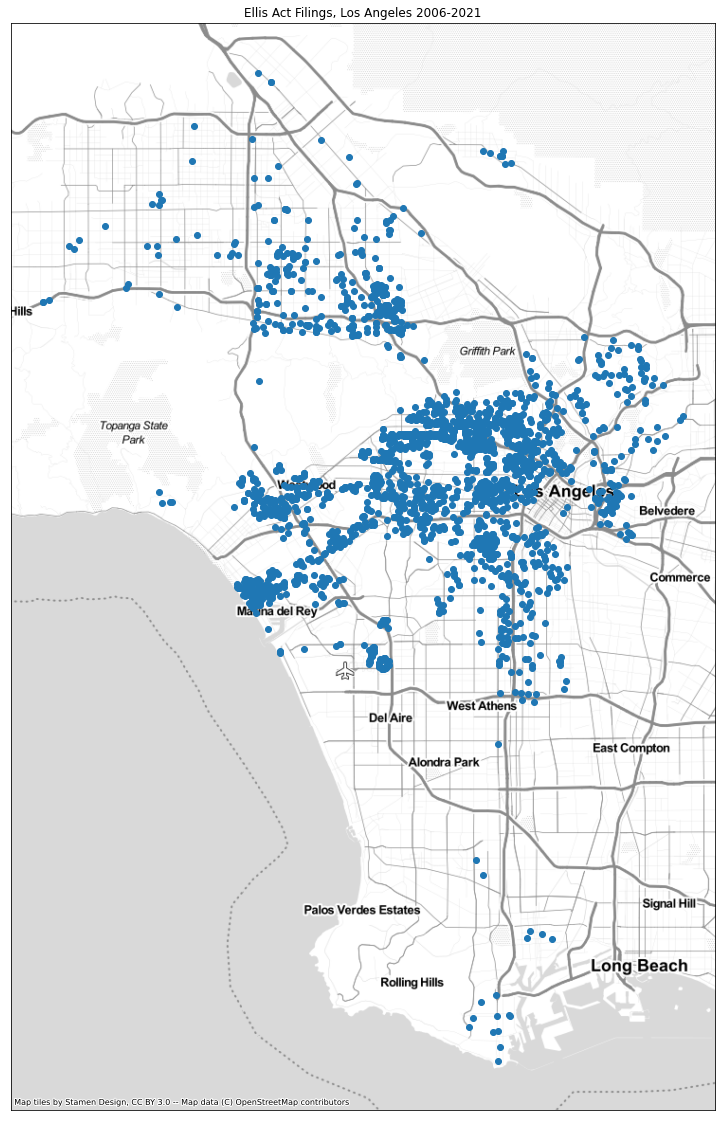

In [21]:
#Map to test the join and conversion

ellisgdf = ellisgdf.set_crs("EPSG:4326")

ellisgdf = ellisgdf.to_crs("EPSG:3857")

%matplotlib inline

fig, ax=plt.subplots(figsize=(20,20))

ellisgdf.plot(ax=ax, legend=True)

plt.title('Ellis Act Filings, Los Angeles 2006-2021')

ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite,zoom=11)

ax.set_xticks([])
ax.set_yticks([])

We will need to join in the information from the contemporary assessor's dataset spatiallY,

In [22]:
#Convert parcels to correct projection for sjoin
parcels2021gdf = parcels2021gdf.to_crs("EPSG:3857")


In [23]:
ellisgdf = ellisgdf.reset_index()
ellisgdf.head(10)

,index,application_received,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit,yearbuilt,units,sqftmain,generalusetype,specificusetype,center_lat,center_lon,geometry
0,2040031029,11/6/19,2019,3,22729 W DEL VALLE ST,LOS ANGELES,91364.0,3,0.0,1955.0,3.0,1860.0,Residential,Three Units (Any Combination),34.165880,-118.621319,POINT (-13204864.818 4051097.450)
1,2040031030,12/4/19,2019,3,22727 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955.0,3.0,1869.0,Residential,Three Units (Any Combination),34.165929,-118.621164,POINT (-13204847.614 4051104.006)
2,2040033033,2/10/16,2016,3,22431 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955.0,3.0,1869.0,Residential,Three Units (Any Combination),34.167389,-118.616525,POINT (-13204331.186 4051300.524)
3,2107014004,4/21/20,2020,3,20327 W STAGG ST,LOS ANGELES,91306.0,3,0.0,1910.0,3.0,2446.0,Residential,Three Units (Any Combination),34.211389,-118.576350,POINT (-13199858.957 4057221.804)
4,2111025021,3/16/16,2016,3,7118 N JORDAN AVE,CANOGA PARK,91303.0,2,9.0,1947.0,2.0,1489.0,Residential,"Double, Duplex, or Two Units",34.199760,-118.602505,POINT (-13202770.503 4055656.567)
5,2112024012,8/13/15,2015,3,7310 N ETON AVE,LOS ANGELES,91303.0,2,0.0,1961.0,2.0,1500.0,Residential,Three Units (Any Combination),34.203280,-118.595121,POINT (-13201948.521 4056130.386)
6,2121005006,8/11/15,2015,3,7325 N ENFIELD AVE,LOS ANGELES,91335.0,1,0.0,1948.0,2.0,2800.0,Residential,"Double, Duplex, or Two Units",34.203684,-118.524593,POINT (-13194097.326 4056184.647)
7,2126006014,2/13/15,2015,3,18561 W GAULT ST,LOS ANGELES,91335.0,2,33.0,1940.0,2.0,1248.0,Residential,"Double, Duplex, or Two Units",34.199446,-118.538227,POINT (-13195615.101 4055614.234)
8,2126023007,8/15/13,2013,3,6819 N BAIRD AVE,RESEDA,91335.0,2,7.0,1947.0,2.0,1366.0,Residential,"Double, Duplex, or Two Units",34.194443,-118.537690,POINT (-13195555.278 4054940.900)
9,2129035010,9/28/16,2016,3,18917 W GAULT ST,RESEDA,91335.0,3,0.0,1953.0,3.0,2933.0,Residential,Three Units (Any Combination),34.199765,-118.545547,POINT (-13196429.938 4055657.274)


In [24]:
#Spatial join to new parcel level information
joinedgdf = gpd.sjoin(ellisgdf, parcels2021gdf, how="left", op='intersects',rsuffix="2021")

joinedgdf.head(10)

,index,application_received,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit,yearbuilt,...,mailaddress,mailcity,mailzip,lastsaledate,lastsaleamount,center_lat_2021,center_lon_2021,lat_lon,shape_length,shape_area
0,2040031029,11/6/19,2019,3,22729 W DEL VALLE ST,LOS ANGELES,91364.0,3,0.0,1955.0,...,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165880,-118.621319,"34.165880, -118.621319",359.764599,6493.890249
1,2040031030,12/4/19,2019,3,22727 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955.0,...,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165929,-118.621164,"34.165929, -118.621164",359.757625,6494.458710
2,2040033033,2/10/16,2016,3,22431 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955.0,...,10633 EMERSON BND,TUSTIN CA,92782-1480,20190327,2725027.0,34.167389,-118.616525,"34.167389, -118.616525",359.997596,6499.826055
3,2107014004,4/21/20,2020,3,20327 W STAGG ST,LOS ANGELES,91306.0,3,0.0,1910.0,...,13016 NE 37TH CT,VANCOUVER WA,98686-4907,19770627,9.0,34.211389,-118.576350,"34.211389, -118.576350",1029.967541,43047.424832
4,2111025021,3/16/16,2016,3,7118 N JORDAN AVE,CANOGA PARK,91303.0,2,9.0,1947.0,...,18341 SHERMAN WAY STE 104B,RESEDA CA,91335-4497,20141107,465004.0,34.199760,-118.602505,"34.199760, -118.602505",399.993088,7499.358901
5,2112024012,8/13/15,2015,3,7310 N ETON AVE,LOS ANGELES,91303.0,2,0.0,1961.0,...,2786 HIGHGATE PL,SIMI VALLEY CA,93065-1413,20181116,9.0,34.203280,-118.595121,"34.203280, -118.595121",399.962891,7498.104502
6,2121005006,8/11/15,2015,3,7325 N ENFIELD AVE,LOS ANGELES,91335.0,1,0.0,1948.0,...,7325 ENFIELD AVE,RESEDA CA,91335-3204,00000000,0.0,34.203684,-118.524593,"34.203684, -118.524593",369.983123,6749.188800
7,2126006014,2/13/15,2015,3,18561 W GAULT ST,LOS ANGELES,91335.0,2,33.0,1940.0,...,6745 DARBY AVE,RESEDA CA,91335-5427,20141016,9.0,34.199446,-118.538227,"34.199446, -118.538227",420.003363,7999.313751
8,2126023007,8/15/13,2013,3,6819 N BAIRD AVE,RESEDA,91335.0,2,7.0,1947.0,...,14001 VENTURA BLVD,SHERMAN OAKS CA,91423-3558,20110208,9.0,34.194443,-118.537690,"34.194443, -118.537690",419.985439,7998.018600
9,2129035010,9/28/16,2016,3,18917 W GAULT ST,RESEDA,91335.0,3,0.0,1953.0,...,16060 VENTURA BLVD STE 110 PMB 126,ENCINO CA,91436-4411,20140731,9.0,34.199765,-118.545547,"34.199765, -118.545547",703.985651,17979.660800


In [25]:
sum(pd.isnull(joinedgdf['center_lat_2021']))

22

In [26]:
nullsgdf = joinedgdf[joinedgdf.center_lon_2021.isnull()]
len(nullsgdf)

22

In [27]:
joinedgdf.columns

Index(['index', 'application_received', 'application_year', 'council_district',
       'address', 'city', 'zip', 'units_withdrawn', 'replacement_unit',
       'yearbuilt', 'units', 'sqftmain', 'generalusetype', 'specificusetype',
       'center_lat_left', 'center_lon_left', 'geometry', 'index_2021',
       'objectid', 'apn', 'situsfulladdress', 'usecode', 'usetype',
       'usedescription', 'yearbuilt1', 'units1', 'sqftmain1', 'yearbuilt2',
       'units2', 'sqftmain2', 'yearbuilt3', 'units3', 'sqftmain3',
       'yearbuilt4', 'units4', 'sqftmain4', 'yearbuilt5', 'units5',
       'sqftmain5', 'ownerfullname', 'mailaddress', 'mailcity', 'mailzip',
       'lastsaledate', 'lastsaleamount', 'center_lat_2021', 'center_lon_2021',
       'lat_lon', 'shape_length', 'shape_area'],
      dtype='object')

In [28]:
len(joinedgdf)

4616

QUESTION: Why are there about 2,000 more records extant? 

LIKELY ANSWER: condo conversions- multiple stacked parcel polygons intersected by join- will have to do a group by function later to disentangle.

In [29]:
nullsgdf = nullsgdf[['application_received', 'application_year', 'council_district','address','city', 'zip', 'units_withdrawn', 'replacement_unit','yearbuilt','units','sqftmain','generalusetype','specificusetype','center_lat_left', 'center_lon_left']]
nullsgdf = nullsgdf.rename(columns={"center_lat_left": "center_lat","center_lon_left": "center_lon"})
nullsgdf.head(10)

,application_received,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit,yearbuilt,units,sqftmain,generalusetype,specificusetype,center_lat,center_lon
59,1/31/18,2018,6,14810 W DELANO ST,VAN NUYS,91411.0,3,0.0,1957.0,3.0,2240.0,Residential,Three Units (Any Combination),34.182355,-118.455907
128,5/2/17,2017,2,11306 W VICTORY BLVD,LOS ANGELES,91606.0,5,0.0,1939.0,5.0,3048.0,Residential,Five or More Units or Apartments (Any Combinat...,34.186380,-118.377231
168,4/10/19,2019,2,11419 W KILLION ST,NORTH HOLLYWOOD,91601.0,6,0.0,1963.0,6.0,4288.0,Residential,Five or More Units or Apartments (Any Combinat...,34.171529,-118.379706
229,10/29/15,2015,2,4712 W VANTAGE AVE,LOS ANGELES,91607.0,6,0.0,1941.0,6.0,5196.0,Residential,Five or More Units or Apartments (Any Combinat...,34.156324,-118.397350
230,10/29/15,2015,2,4722 W VANTAGE AVE,LOS ANGELES,91607.0,3,0.0,1940.0,3.0,1800.0,Residential,Three Units (Any Combination),34.156530,-118.397347
231,10/29/15,2015,2,4726 W VANTAGE AVE,LOS ANGELES,91607.0,3,0.0,1940.0,3.0,1800.0,Residential,Three Units (Any Combination),34.156667,-118.397347
358,10/10/14,2014,6,11933 W ALLEGHENY ST,Los Angeles,91352.0,2,0.0,1952.0,2.0,1850.0,Residential,"Double, Duplex, or Two Units",34.237401,-118.393349
388,2/27/15,2015,11,7036 S LA TIJERA BLVD,LOS ANGELES,90045.0,3,0.0,1947.0,3.0,1789.0,Residential,Three Units (Any Combination),33.974072,-118.374902
395,12/13/17,2017,11,7199 S LA CIENEGA BLVD,LOS ANGELES,90045.0,2,0.0,1950.0,2.0,1819.0,Residential,"Double, Duplex, or Two Units",33.970280,-118.370647
471,8/24/07,2007,11,13440 W BEACH AVE,MARINA DEL REY,90292.0,3,0.0,1955.0,3.0,1832.0,Residential,Three Units (Any Combination),33.990607,-118.445114


In [30]:
nullsjoingdf = nullsgdf.join(parcels2021gdf, how="left",rsuffix='_parcel')
nullsjoingdf.head(22)

,application_received,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit,yearbuilt,units,...,mailcity,mailzip,lastsaledate,lastsaleamount,center_lat_parcel,center_lon_parcel,lat_lon,shape_length,shape_area,geometry
59,1/31/18,2018,6,14810 W DELANO ST,VAN NUYS,91411.0,3,0.0,1957.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
128,5/2/17,2017,2,11306 W VICTORY BLVD,LOS ANGELES,91606.0,5,0.0,1939.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
168,4/10/19,2019,2,11419 W KILLION ST,NORTH HOLLYWOOD,91601.0,6,0.0,1963.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
229,10/29/15,2015,2,4712 W VANTAGE AVE,LOS ANGELES,91607.0,6,0.0,1941.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
230,10/29/15,2015,2,4722 W VANTAGE AVE,LOS ANGELES,91607.0,3,0.0,1940.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
231,10/29/15,2015,2,4726 W VANTAGE AVE,LOS ANGELES,91607.0,3,0.0,1940.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
358,10/10/14,2014,6,11933 W ALLEGHENY ST,Los Angeles,91352.0,2,0.0,1952.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
388,2/27/15,2015,11,7036 S LA TIJERA BLVD,LOS ANGELES,90045.0,3,0.0,1947.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
395,12/13/17,2017,11,7199 S LA CIENEGA BLVD,LOS ANGELES,90045.0,2,0.0,1950.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
471,8/24/07,2007,11,13440 W BEACH AVE,MARINA DEL REY,90292.0,3,0.0,1955.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [31]:
sum(pd.isnull(nullsjoingdf['center_lon_parcel']))

22

In [32]:
cleanedgdf = joinedgdf.dropna(subset=['ownerfullname'])
len(cleanedgdf)

4594

In [33]:
cleanedgdf = cleanedgdf.reset_index()

In [34]:
cleanedgdf.head(10)

,level_0,index,application_received,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit,...,mailaddress,mailcity,mailzip,lastsaledate,lastsaleamount,center_lat_2021,center_lon_2021,lat_lon,shape_length,shape_area
0,0,2040031029,11/6/19,2019,3,22729 W DEL VALLE ST,LOS ANGELES,91364.0,3,0.0,...,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165880,-118.621319,"34.165880, -118.621319",359.764599,6493.890249
1,1,2040031030,12/4/19,2019,3,22727 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,...,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165929,-118.621164,"34.165929, -118.621164",359.757625,6494.458710
2,2,2040033033,2/10/16,2016,3,22431 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,...,10633 EMERSON BND,TUSTIN CA,92782-1480,20190327,2725027.0,34.167389,-118.616525,"34.167389, -118.616525",359.997596,6499.826055
3,3,2107014004,4/21/20,2020,3,20327 W STAGG ST,LOS ANGELES,91306.0,3,0.0,...,13016 NE 37TH CT,VANCOUVER WA,98686-4907,19770627,9.0,34.211389,-118.576350,"34.211389, -118.576350",1029.967541,43047.424832
4,4,2111025021,3/16/16,2016,3,7118 N JORDAN AVE,CANOGA PARK,91303.0,2,9.0,...,18341 SHERMAN WAY STE 104B,RESEDA CA,91335-4497,20141107,465004.0,34.199760,-118.602505,"34.199760, -118.602505",399.993088,7499.358901
5,5,2112024012,8/13/15,2015,3,7310 N ETON AVE,LOS ANGELES,91303.0,2,0.0,...,2786 HIGHGATE PL,SIMI VALLEY CA,93065-1413,20181116,9.0,34.203280,-118.595121,"34.203280, -118.595121",399.962891,7498.104502
6,6,2121005006,8/11/15,2015,3,7325 N ENFIELD AVE,LOS ANGELES,91335.0,1,0.0,...,7325 ENFIELD AVE,RESEDA CA,91335-3204,00000000,0.0,34.203684,-118.524593,"34.203684, -118.524593",369.983123,6749.188800
7,7,2126006014,2/13/15,2015,3,18561 W GAULT ST,LOS ANGELES,91335.0,2,33.0,...,6745 DARBY AVE,RESEDA CA,91335-5427,20141016,9.0,34.199446,-118.538227,"34.199446, -118.538227",420.003363,7999.313751
8,8,2126023007,8/15/13,2013,3,6819 N BAIRD AVE,RESEDA,91335.0,2,7.0,...,14001 VENTURA BLVD,SHERMAN OAKS CA,91423-3558,20110208,9.0,34.194443,-118.537690,"34.194443, -118.537690",419.985439,7998.018600
9,9,2129035010,9/28/16,2016,3,18917 W GAULT ST,RESEDA,91335.0,3,0.0,...,16060 VENTURA BLVD STE 110 PMB 126,ENCINO CA,91436-4411,20140731,9.0,34.199765,-118.545547,"34.199765, -118.545547",703.985651,17979.660800


In [35]:
cleanedgdf.columns

Index(['level_0', 'index', 'application_received', 'application_year',
       'council_district', 'address', 'city', 'zip', 'units_withdrawn',
       'replacement_unit', 'yearbuilt', 'units', 'sqftmain', 'generalusetype',
       'specificusetype', 'center_lat_left', 'center_lon_left', 'geometry',
       'index_2021', 'objectid', 'apn', 'situsfulladdress', 'usecode',
       'usetype', 'usedescription', 'yearbuilt1', 'units1', 'sqftmain1',
       'yearbuilt2', 'units2', 'sqftmain2', 'yearbuilt3', 'units3',
       'sqftmain3', 'yearbuilt4', 'units4', 'sqftmain4', 'yearbuilt5',
       'units5', 'sqftmain5', 'ownerfullname', 'mailaddress', 'mailcity',
       'mailzip', 'lastsaledate', 'lastsaleamount', 'center_lat_2021',
       'center_lon_2021', 'lat_lon', 'shape_length', 'shape_area'],
      dtype='object')

In [36]:
cleanedgdf = cleanedgdf[['index', 'application_received', 'application_year',
       'council_district', 'address', 'city', 'zip', 'units_withdrawn',
       'replacement_unit', 'yearbuilt', 'units', 'sqftmain','generalusetype',
       'specificusetype', 'center_lat_left',
       'center_lon_left', 'geometry', 'index_2021', 'objectid', 'apn',
       'situsfulladdress', 'usecode', 'usetype', 'usedescription',
       'yearbuilt1', 'units1', 'sqftmain1', 'yearbuilt2', 'units2',
       'sqftmain2', 'yearbuilt3', 'units3', 'sqftmain3', 'yearbuilt4',
       'units4', 'sqftmain4', 'yearbuilt5', 'units5', 'sqftmain5',
       'ownerfullname', 'mailaddress', 'mailcity', 'mailzip', 'lastsaledate',
       'lastsaleamount', 'center_lat_2021', 'center_lon_2021', 'lat_lon',
       'shape_length', 'shape_area']]

cleanedgdf = cleanedgdf.rename(columns={"center_lat_left": "center_lat",
        "center_lon_left": "center_lon", "index":"ain","index_2021":"ain_2021",})

cleanedgdf.head()

,ain,application_received,application_year,council_district,address,city,zip,units_withdrawn,replacement_unit,yearbuilt,...,mailaddress,mailcity,mailzip,lastsaledate,lastsaleamount,center_lat_2021,center_lon_2021,lat_lon,shape_length,shape_area
0,2040031029,11/6/19,2019,3,22729 W DEL VALLE ST,LOS ANGELES,91364.0,3,0.0,1955.0,...,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165880,-118.621319,"34.165880, -118.621319",359.764599,6493.890249
1,2040031030,12/4/19,2019,3,22727 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955.0,...,1118 OLD PHILLIPS RD,GLENDALE CA,91207-1112,20171228,1675016.0,34.165929,-118.621164,"34.165929, -118.621164",359.757625,6494.458710
2,2040033033,2/10/16,2016,3,22431 W DEL VALLE ST,WOODLAND HILLS,91364.0,3,0.0,1955.0,...,10633 EMERSON BND,TUSTIN CA,92782-1480,20190327,2725027.0,34.167389,-118.616525,"34.167389, -118.616525",359.997596,6499.826055
3,2107014004,4/21/20,2020,3,20327 W STAGG ST,LOS ANGELES,91306.0,3,0.0,1910.0,...,13016 NE 37TH CT,VANCOUVER WA,98686-4907,19770627,9.0,34.211389,-118.576350,"34.211389, -118.576350",1029.967541,43047.424832
4,2111025021,3/16/16,2016,3,7118 N JORDAN AVE,CANOGA PARK,91303.0,2,9.0,1947.0,...,18341 SHERMAN WAY STE 104B,RESEDA CA,91335-4497,20141107,465004.0,34.199760,-118.602505,"34.199760, -118.602505",399.993088,7499.358901


In [37]:
#Export to file
cleanedgdf.to_csv('/Users/alexanderferrer/Documents/GitHub/UP229_Ellis/cleaned_ellis.csv')

For these 22 filings we cannot identify current information, having attempted both table and spatial joins to the assessor's dataset. These records were dropped, a loss of less than 1% of original records (11/2,622), and far less of current records.

Notes: 

Each row represents one current parcel where the Ellis Act was filed.

There are more 2021 parcels (ains) than 2006 (ains), likely due to condo conversions.

Be careful to group by either original ains, or other appropriate column depending on operatation.

For count point in polygon excercise to find filings within a tract, group by 2006 parcel code (ain) FIRST.